# Data Science Project

## Introduction

The project objective is to  generate knowledge by validating a hypothesis based on the given dataset

To accomplish this, the following is defined:

- **Dataset.** The selected dataset is about soccer which contains information related to each player registered in the FIFA 2017 video game, including statistical information of each player and some personal data


- **Hipothesis to validate.**  Is there any relationship exist among age, nationality, preferred foot, position, date joined to club, data about loaned club, date valid contract, height, weight and release clause to determine value and wage player?

<img src="https://www.freewebheaders.com/wp-content/gallery/football/sports-soccer-stadium-night-scene-web-header.jpg" style="width: 100%"/>

## Pre-processing preparation

### Necessary libraries

The libraries needed to manipulate the dataset are:
- **pandas**
- **re**
- **numpy**

For the predictive model:
- **sklearn**

For plotting figures:
- **matplotlib**
- **seaborn**


In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

plt.style.use('ggplot')

### Dataset to import


As mentioned in the introduction, the variables to extract from the data set are the following:

- ID
- Age
- Nationality
- Club
- Value
- Wage
- Preferred Foot
- Position
- Joined
- Loaned From
- Contract Valid Until
- Height
- Weight
- Release Clause

Those variables are renamed in the *dataframe* to improve accessibility in the code.

In [2]:
dataframe = (pd.read_csv("futbol.csv")).filter(
    ["ID", "Age", "Nationality", "Club", "Value", "Wage", "Preferred Foot", "Position", "Joined", "Loaned From",
     "Contract Valid Until", "Height", "Weight", "Release Clause"]).rename(
    columns={"Preferred Foot": 'Preferred_foot', 'Loaned From': 'Loaned_from',
             'Contract Valid Until': 'Contract_Valid_Until', 'Release Clause': 'Release_clause'})

*dataframe* is visualized.

In [3]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


## Data mining

In this secion the *dataframe* is cleaned to prepare it for **data visualization** and the **predictive model**.

### Data cleaning

Columns/variables data types are checked.

In [4]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,int64
Age,int64
Nationality,object
Club,object
Value,object
Wage,object
Preferred_foot,object
Position,object
Joined,object
Loaned_from,object


Due to the variable age is integer type, the maximum and minimum value is found.

In [5]:
pd.DataFrame(dataframe[['Age']].max(), columns=['Valor máximo'])

,Valor máximo
Age,45


In [6]:
pd.DataFrame(dataframe[['Age']].min(), columns=['Valor Mínimo'])

,Valor Mínimo
Age,16


The same is done for the *ID* column.

In [7]:
pd.DataFrame(dataframe[['ID']].max(), columns=['Valor máximo'])

,Valor máximo
ID,246620


In [8]:
pd.DataFrame(dataframe[['ID']].min(), columns=['Valor mínimo'])

,Valor mínimo
ID,16


Columns have no negative values and the maximums are known, so it's possible to change the data type to improve performance.

In [9]:
dataframe = dataframe.astype({"ID": np.uint32, 'Age': np.uint8})

*dataframe* null data are visualized.

In [10]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,241
Value,0
Wage,0
Preferred_foot,48
Position,60
Joined,1553
Loaned_from,16943


**Important note:** In the situation context, it's possible to assign default values for null data of **Club** and **Realease_clause** columns.

Intersected null data from the following columns are displayed:

- Preferred_foot
- Position
- Joined
- Loaned_from
- Contract_Valid_Until
- Height
- Weight

In [11]:
dataframe[pd.isnull(
    dataframe[['Preferred_foot', 'Position', 'Joined', 'Loaned_from', 'Contract_Valid_Until', 'Height', 'Weight']]).all(
    axis=1)]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
13236,177971,33,Scotland,Rochdale,€120K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,195380,29,Nicaragua,Boyacá Chicó FC,€300K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,139317,35,England,Notts County,€140K,€3K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,240437,20,Italy,Brescia,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,209462,24,England,Hamilton Academical FC,€400K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,219702,21,Poland,Śląsk Wrocław,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,225590,23,Argentina,Club Atlético Aldosivi,€450K,€2K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,233782,19,England,Everton,€600K,€5K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,239158,30,Denmark,Hobro IK,€230K,€2K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,242998,21,Brazil,HJK Helsinki,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As it can be inferred that the null data rows are the same in **Weight**, **Height** and **Position** columns, these rows can be deleted from any mentioned columns.

In [12]:
dataframe.dropna(subset=['Position'], inplace=True)

*dataframe* is displayed.

Null data is checked again.

In [13]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,229
Value,0
Wage,0
Preferred_foot,0
Position,0
Joined,1493
Loaned_from,16883


**Nota importante:** It's not validated but it's possible to think that null data in **Club** and **Contract_Valid_Until** columns are the same.

Remaining columns which is not possible to assign default values are the following:

- Joined
- Loaned_from
- Contract_Valid_Until

Intersected null data from these columns are shown:

In [14]:
dataframe[pd.isnull(dataframe[['Joined', 'Loaned_from', 'Contract_Valid_Until']]).all(axis=1)]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
452,207439,24,Argentina,NaN,€0,€0,Right,CM,NaN,NaN,NaN,5'11,165lbs,NaN
538,156713,33,Sweden,NaN,€0,€0,Right,LCB,NaN,NaN,NaN,6'4,185lbs,NaN
568,229909,26,Russia,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'2,176lbs,NaN
677,187347,29,Russia,NaN,€0,€0,Right,RB,NaN,NaN,NaN,5'10,154lbs,NaN
874,187607,29,Russia,NaN,€0,€0,Right,ST,NaN,NaN,NaN,6'5,201lbs,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,225489,23,Iceland,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'5,187lbs,NaN
16976,236774,21,India,NaN,€0,€0,Left,LW,NaN,NaN,NaN,5'9,154lbs,NaN
17008,234234,27,Bulgaria,NaN,€0,€0,Right,LDM,NaN,NaN,NaN,6'0,163lbs,NaN
17197,245164,21,India,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'2,176lbs,NaN


It's possible to infer that all rows are from **Contract_Valid_Until** column, therefore such data is removed.

In [15]:
dataframe.dropna(subset=['Contract_Valid_Until'], inplace=True)

*dataframe* is displayed.

In [16]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


Remaining null data are shown.

In [17]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Joined,1264
Loaned_from,16654


**Nota importante:** By observing the dataset, it's possible to conclude that **Joined** column is exclusive to **Loaned From**.

To validate the last  statement, **Loaned_from** column null data are displayed along  not null data from the **Joined** column

In [18]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull() == False]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


As it seems all the rows are shown, it does the following for last validation:
- Shape of the null data from **Loaned_from** and not null data from **Joined** is the same shape from dataframe.

In [19]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull() == False].values.shape == dataframe.shape

True

To manage this case, a **Joined** columns is rename to **Loaned** for representing if the player is loaned.

In [20]:
dataframe.rename({'Joined': 'Loaned'}, axis=1, inplace=True)

*dataframe* **Loaned** column is reassigned to store boolean values based on null data and not null data from that column.

In [21]:
dataframe.Loaned = dataframe.Loaned.isnull()

First 30 *dataframe* **Loaned** column null data rows is displayed.

In [22]:
dataframe[dataframe.Loaned == True].head(n=30)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
28,198710,26,Colombia,FC Bayern München,€69.5M,€315K,Left,LAM,True,Real Madrid,"Jun 30, 2019",5'11,172lbs,NaN
38,167664,30,Argentina,Milan,€57M,€245K,Right,LS,True,Juventus,"Jun 30, 2019",6'1,196lbs,NaN
91,187961,29,Brazil,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,LDM,True,FC Barcelona,"Jun 30, 2019",6'0,157lbs,NaN
166,212523,24,Brazil,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,CAM,True,SL Benfica,"Dec 31, 2018",6'3,176lbs,NaN
176,207410,24,Croatia,Chelsea,€35M,€165K,Right,LCM,True,Real Madrid,"Jun 30, 2019",5'9,172lbs,NaN
332,216409,24,Italy,Inter,€22.5M,€57K,Left,RM,True,Sassuolo,"Jun 30, 2019",5'7,148lbs,NaN
354,203890,26,Croatia,Inter,€18M,€57K,Right,RB,True,Atlético Madrid,"Jun 30, 2019",5'11,168lbs,NaN
357,202685,27,Italy,Torino,€21M,€48K,Left,RS,True,Valencia CF,"Jun 30, 2019",6'1,185lbs,NaN
427,226226,22,Argentina,Real Betis,€20M,€72K,Left,RCM,True,Paris Saint-Germain,"Jun 30, 2019",5'9,154lbs,NaN
434,219809,23,France,Milan,€17M,€85K,Right,LCM,True,Chelsea,"Jun 30, 2019",6'2,187lbs,NaN


First 30 *dataframe* **Loaned** column non-null data rows is displayed.

In [23]:
dataframe[dataframe.Loaned == False].head(n=10)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,False,NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,False,NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,False,NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,False,NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,False,NaN,2023,5'11,154lbs,€196.4M
5,183277,27,Belgium,Chelsea,€93M,€340K,Right,LF,False,NaN,2020,5'8,163lbs,€172.1M
6,177003,32,Croatia,Real Madrid,€67M,€420K,Right,RCM,False,NaN,2020,5'8,146lbs,€137.4M
7,176580,31,Uruguay,FC Barcelona,€80M,€455K,Right,RS,False,NaN,2021,6'0,190lbs,€164M
8,155862,32,Spain,Real Madrid,€51M,€380K,Right,RCB,False,NaN,2020,6'0,181lbs,€104.6M
9,200389,25,Slovenia,Atlético Madrid,€68M,€94K,Right,GK,False,NaN,2021,6'2,192lbs,€144.5M


As the **Loaned** is a column which replaces the **Loaned_from** and **Joined** columns, then the **Loaned_from** is removed.

In [24]:
dataframe.drop(['Loaned_from'], axis=1, inplace=True)

*dataframe* is displayed.

In [25]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,False,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,False,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,False,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,False,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,False,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,False,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,False,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,False,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,False,2019,5'10,154lbs,€143K


Remaining null data is shown.

In [26]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Loaned,0
Contract_Valid_Until,0


**Important note:** It can be observed that **Release_clause** is the remaining column with null data

The null data **Release_clause** is reassign to '*€0M*' .

In [27]:
dataframe.loc[dataframe.Release_clause.isnull(), 'Release_clause'] = '€0M'

 **Release_clause**'s reassigned null data  is displayed.

In [28]:
dataframe[dataframe.Release_clause == '€0M']

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
28,198710,26,Colombia,FC Bayern München,€69.5M,€315K,Left,LAM,True,"Jun 30, 2019",5'11,172lbs,€0M
38,167664,30,Argentina,Milan,€57M,€245K,Right,LS,True,"Jun 30, 2019",6'1,196lbs,€0M
91,187961,29,Brazil,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,LDM,True,"Jun 30, 2019",6'0,157lbs,€0M
166,212523,24,Brazil,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,CAM,True,"Dec 31, 2018",6'3,176lbs,€0M
176,207410,24,Croatia,Chelsea,€35M,€165K,Right,LCM,True,"Jun 30, 2019",5'9,172lbs,€0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,241341,21,China PR,Guizhou Hengfeng FC,€60K,€2K,Right,CM,True,"Dec 31, 2018",6'0,172lbs,€0M
18026,241444,21,China PR,Guizhou Hengfeng FC,€50K,€2K,Right,LM,True,"Dec 31, 2018",5'10,143lbs,€0M
18031,243506,20,China PR,Stabæk Fotball,€40K,€2K,Right,RB,True,"Dec 31, 2018",5'7,143lbs,€0M
18056,244872,19,Italy,Ascoli,€60K,€3K,Left,CM,True,"Jun 30, 2019",5'10,143lbs,€0M


**Important note:** It´s observavble that the raplacement was succesfully.

A final null data check is realized.

In [29]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Loaned,0
Contract_Valid_Until,0


**Important note:** There is no null data left.

Data types of each column is displayed.

In [30]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,uint32
Age,uint8
Nationality,object
Club,object
Value,object
Wage,object
Preferred_foot,object
Position,object
Loaned,bool
Contract_Valid_Until,object


**Important note:** Data types of **Value**, **Wage**, **Height** y **Release_clause** columns are object/string data type instead of any numerica data type.

A pattern can be observed from the dataset in **Value**, **Wage** and **Release_clause** columns which contains the following characters:
As prefix:

-  *€*

As postfix:
- *K* or *M*

Regular expression is used to validate that all rows from those columns match.

The regular expression is:




In [31]:
all(dataframe[['Value', 'Wage', 'Release_clause']].apply(
    lambda series: [re.fullmatch('€(([1-9]|[1-9][0-9]|[1-5][0-9]{2}|600)(?:\.[0-9]{1,2}){0,1}[MK]|0)', value) for value
                    in series]))

True

After validating that all rows match to regular expression, the numbers are extracted from each string value, convert them to the indicated data type and reasssigned to its respective column.

Regular expression used for extracting numbers is:
- *(\d+(?:\.\d+)?)*


In [32]:
np.uint32(dataframe[['Value', 'Wage', 'Release_clause']].apply(lambda series: [np.float16(tupla[1]) * 1000
                                                                               if ('M' in tupla[0]) else tupla[1] for
                                                                               tupla in [(value,
                                                                                          re.findall('(\d+(?:\.\d+)?)',
                                                                                                     value)[0]) for
                                                                                         value in series]]))

array([[110500,    565, 226500],
       [ 77000,    405, 127125],
       [118500,    290, 228125],
       ...,
       [    60,      1,    165],
       [    60,      1,    143],
       [    60,      1,    165]], dtype=uint32)

In [33]:
dataframe[['Value', 'Wage', 'Release_clause']]

,Value,Wage,Release_clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
...,...,...,...
18202,€60K,€1K,€143K
18203,€60K,€1K,€113K
18204,€60K,€1K,€165K
18205,€60K,€1K,€143K


In [34]:
dataframe[['Value', 'Wage', 'Release_clause']] = np.uint32(
    dataframe[['Value', 'Wage', 'Release_clause']].apply(lambda series: [tupla[1] * 1000
                                                                         if ('M' in tupla[0]) else tupla[1] for tupla in
                                                                         [(value, np.float16(
                                                                             re.findall('(\d+(?:\.\d+)?)', value)[0]))
                                                                          for value in series]]))

**Weight** column contains a string representing the value in pounds (*lbs*) with the following character:
Postfix:
- *lbs*

This is validated using a regular expression that confirms the postfix in all rows and the numbers are not greater than 251.

The regular expression used is the following:
- *((8\d|9\d|1\d{2}|2[0-4]\d|250))lbs*

In [35]:
all([re.fullmatch('((8\d|9\d|1\d{2}|2[0-4]\d|250))lbs', value) for value in dataframe.Weight])

True

After verifying the above, the numbers are extracted from the string value, convert them into the indicated data type and reassigned to the **Weigth** column.
The regular expression used for extracting numbers is the following:
- *(\d+(?:\.\d+)?)*

In [36]:
dataframe.Weight = np.uint8((dataframe.Weight.apply(lambda x: re.findall('(\d+(?:\.\d+)?)', x)[0])))

In [37]:
dataframe[['Weight']]

,Weight
0,159
1,183
2,150
3,168
4,154
...,...
18202,134
18203,170
18204,148
18205,154


**Height** column contains a string representing the value in feet and inches with the following character:
Infix:
- *'*
It´s validated tha all rows match with that infix, feets are not greater than 8 and inches are not greater than 12 using the following regular expression:
- *[0-7]\'(1[0-2]|\d)*

In [38]:
all([re.fullmatch('[0-7]\'(1[0-2]|\d)', value) for value in dataframe.Height])

True

After verifying above, then all numbers are extracted fromt he string value, converted to the indicated data type and manipulated to be converted to only inches and reassigned to the **Heigth** column.

In [39]:
dataframe.Height = [np.uint8(y[0] * 12 + y[1]) for y in [[np.uint8(y) for y in x.split("'")] for x in dataframe.Height]]

In [40]:
dataframe[['Height']]

,Height
0,67
1,74
2,69
3,76
4,71
...,...
18202,69
18203,75
18204,68
18205,70


**Importante note:** Conversion is applied to interpret in a better way the **Height** column values.

Due to the complexity in the **Contract_Valid_Until** columns which contains in some rows much information, decision has been made to extract only the year.

The following regular expression is used to detect numbers between 2015 and 2026:
- *(201[5-9]|202[0-6])*

In [41]:
all([re.findall('(201[5-9]|202[0-6])', x) for x in dataframe.Contract_Valid_Until])

True

After verifying the above, the year is extracted, converted into the indicated data type and reassigned to the **Contract_Valid_Until** column.

In [42]:
# cProfile.run('dataframe.Contract_Valid_Until.apply(lambda x: np.uint16(re.findall(\'20[1-2][0-9]\', x)[0]))')

In [43]:
# cProfile.run('[np.uint16(re.findall(\'20[1-2][0-9]\', x)[0]) for x in dataframe.Contract_Valid_Until]')

In [44]:
dataframe.Contract_Valid_Until = dataframe.Contract_Valid_Until.apply(
    lambda x: np.uint16(re.findall('20[1-2][0-9]', x)[0]))

Given the **Preferred_foot** column has to have string values by default, it checks what string values and how often each string value is.

In [45]:
pd.DataFrame((lambda x: {'Preferred_foot': x.index})(dataframe.Preferred_foot.value_counts()))

,Preferred_foot
0,Right
1,Left


**Important note:** It can be observed that the only string values are *Left* and *Right*.

The new assigned data types are shown:

In [46]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,uint32
Age,uint8
Nationality,object
Club,object
Value,uint32
Wage,uint32
Preferred_foot,object
Position,object
Loaned,bool
Contract_Valid_Until,uint16


*dataframe* is displayed.

In [47]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500,565,Left,RF,False,2021,67,159,226500
1,20801,33,Portugal,Juventus,77000,405,Right,ST,False,2022,74,183,127125
2,190871,26,Brazil,Paris Saint-Germain,118500,290,Right,LW,False,2022,69,150,228125
3,193080,27,Spain,Manchester United,72000,260,Right,GK,False,2020,76,168,138625
4,192985,27,Belgium,Manchester City,102000,355,Right,RCM,False,2023,71,154,196375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,60,1,Right,CM,False,2019,69,134,143
18203,243165,19,Sweden,Trelleborgs FF,60,1,Right,ST,False,2020,75,170,113
18204,241638,16,England,Cambridge United,60,1,Right,ST,False,2021,68,148,165
18205,246268,17,England,Tranmere Rovers,60,1,Right,RW,False,2019,70,154,143


In [48]:
dataframe.head(n=20)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500,565,Left,RF,False,2021,67,159,226500
1,20801,33,Portugal,Juventus,77000,405,Right,ST,False,2022,74,183,127125
2,190871,26,Brazil,Paris Saint-Germain,118500,290,Right,LW,False,2022,69,150,228125
3,193080,27,Spain,Manchester United,72000,260,Right,GK,False,2020,76,168,138625
4,192985,27,Belgium,Manchester City,102000,355,Right,RCM,False,2023,71,154,196375
5,183277,27,Belgium,Chelsea,93000,340,Right,LF,False,2020,68,163,172125
6,177003,32,Croatia,Real Madrid,67000,420,Right,RCM,False,2020,68,146,137375
7,176580,31,Uruguay,FC Barcelona,80000,455,Right,RS,False,2021,72,190,164000
8,155862,32,Spain,Real Madrid,51000,380,Right,RCB,False,2020,72,181,104625
9,200389,25,Slovenia,Atlético Madrid,68000,94,Right,GK,False,2021,74,192,144500


### Dataframe normalizaton

A *dataframe* copy is realized to *normalizedDataframe*

In [49]:
normalizedDataframe = dataframe.copy()

*normalizedDataframe* is displayed.

In [50]:
normalizedDataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500,565,Left,RF,False,2021,67,159,226500
1,20801,33,Portugal,Juventus,77000,405,Right,ST,False,2022,74,183,127125
2,190871,26,Brazil,Paris Saint-Germain,118500,290,Right,LW,False,2022,69,150,228125
3,193080,27,Spain,Manchester United,72000,260,Right,GK,False,2020,76,168,138625
4,192985,27,Belgium,Manchester City,102000,355,Right,RCM,False,2023,71,154,196375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,60,1,Right,CM,False,2019,69,134,143
18203,243165,19,Sweden,Trelleborgs FF,60,1,Right,ST,False,2020,75,170,113
18204,241638,16,England,Cambridge United,60,1,Right,ST,False,2021,68,148,165
18205,246268,17,England,Tranmere Rovers,60,1,Right,RW,False,2019,70,154,143


**Important note:** Some columns are not able to normalize because are string data type, then it's necessary to create a subset for those columns.

A dataframe is created from a **Nationality** column set and the frecuency of this set.

In [51]:
countryDataframe = pd.DataFrame(
    (lambda x: {'Nationality': x.index, 'Frequency': x.values.astype('uint16')})(dataframe.Nationality.value_counts()))

*countryDataframe* is displayed.

In [52]:
countryDataframe

,Nationality,Frequency
0,England,1657
1,Germany,1195
2,Spain,1071
3,Argentina,935
4,France,911
...,...,...
158,Guam,1
159,Fiji,1
160,Liberia,1
161,Mauritius,1


In [53]:
countryDataframe.head(n=20)

,Nationality,Frequency
0,England,1657
1,Germany,1195
2,Spain,1071
3,Argentina,935
4,France,911
5,Brazil,825
6,Italy,699
7,Colombia,616
8,Japan,478
9,Netherlands,452


A dataframe is created from a **Club** column set and the frecuency of this set.

In [54]:
clubDataframe = pd.DataFrame(
    (lambda x: {'Club': x.index, 'Frequency': x.values.astype('uint16')})(dataframe.Club.value_counts()))

*clubDataframe* is displayed.

In [55]:
clubDataframe

,Club,Frequency
0,FC Barcelona,33
1,Southampton,33
2,Cardiff City,33
3,TSG 1899 Hoffenheim,33
4,Wolverhampton Wanderers,33
...,...,...
646,Vitória,20
647,Paraná,20
648,Sligo Rovers,19
649,Limerick FC,19


In [56]:
clubDataframe.head(n=20)

,Club,Frequency
0,FC Barcelona,33
1,Southampton,33
2,Cardiff City,33
3,TSG 1899 Hoffenheim,33
4,Wolverhampton Wanderers,33
5,RC Celta,33
6,Fortuna Düsseldorf,33
7,Rayo Vallecano,33
8,Valencia CF,33
9,CD Leganés,33


A dataframe is created from a **Preferred_foot** column set and the frecuency of this set.

In [57]:
preferredFootDataframe = pd.DataFrame((lambda x: {'Preferred_foot': x.index, 'Frequency': x.values.astype('int16')})(
    dataframe.Preferred_foot.value_counts()))

*Preferred_foot* is displayed.

In [58]:
preferredFootDataframe

,Preferred_foot,Frequency
0,Right,13756
1,Left,4162


A dataframe is created from a **Position** column set and the frecuency of this set.

In [59]:
positionDataframe = pd.DataFrame(
    (lambda x: {'Position': x.index, 'Frequency': x.values.astype('int16')})(dataframe.Position.value_counts()))

*positionDataframe* is displayed.

In [60]:
positionDataframe

,Position,Frequency
0,ST,2130
1,GK,1992
2,CB,1754
3,CM,1377
4,LB,1305
5,RB,1268
6,RM,1114
7,LM,1086
8,CAM,948
9,CDM,936


In [61]:
positionDataframe.head(n=30)

,Position,Frequency
0,ST,2130
1,GK,1992
2,CB,1754
3,CM,1377
4,LB,1305
5,RB,1268
6,RM,1114
7,LM,1086
8,CAM,948
9,CDM,936


A dataframe is created from a **Loaned** column set and the frecuency of this set..

In [62]:
loanedDataframe = pd.DataFrame(
    (lambda x: {'Loaned': x.index, 'Frequency': x.values.astype('int16')})(dataframe.Loaned.value_counts()))

*loanedDataframe* is displayed.

In [63]:
loanedDataframe

,Loaned,Frequency
0,False,16654
1,True,1264


In automatic manner, the values from the **Nationality**, **Club**, **Preferred_foot**, **Position** y **Loaned** columns are replaced with the values from the geneerated subsets.

In [64]:
for tupla in {'Nationality': countryDataframe, 'Club': clubDataframe, 'Preferred_foot': preferredFootDataframe,
              'Position': positionDataframe, 'Loaned': loanedDataframe}.items():
    normalizedDataframe[tupla[0]] = dataframe[tupla[0]].apply(
        lambda x: (tupla[1][tupla[0]].loc[tupla[1][tupla[0]] == x].index[0]))

In [65]:
normalizedDataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,3,0,110500,565,1,25,0,2021,67,159,226500
1,20801,33,21,559,77000,405,0,0,0,2022,74,183,127125
2,190871,26,5,146,118500,290,0,14,0,2022,69,150,228125
3,193080,27,2,23,72000,260,0,1,0,2020,76,168,138625
4,192985,27,25,24,102000,355,0,13,0,2023,71,154,196375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,0,296,60,1,0,3,0,2019,69,134,143
18203,243165,19,10,376,60,1,0,0,0,2020,75,170,113
18204,241638,16,0,301,60,1,0,0,0,2021,68,148,165
18205,246268,17,0,379,60,1,0,15,0,2019,70,154,143


In [66]:
dataframe.head(n=20)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500,565,Left,RF,False,2021,67,159,226500
1,20801,33,Portugal,Juventus,77000,405,Right,ST,False,2022,74,183,127125
2,190871,26,Brazil,Paris Saint-Germain,118500,290,Right,LW,False,2022,69,150,228125
3,193080,27,Spain,Manchester United,72000,260,Right,GK,False,2020,76,168,138625
4,192985,27,Belgium,Manchester City,102000,355,Right,RCM,False,2023,71,154,196375
5,183277,27,Belgium,Chelsea,93000,340,Right,LF,False,2020,68,163,172125
6,177003,32,Croatia,Real Madrid,67000,420,Right,RCM,False,2020,68,146,137375
7,176580,31,Uruguay,FC Barcelona,80000,455,Right,RS,False,2021,72,190,164000
8,155862,32,Spain,Real Madrid,51000,380,Right,RCB,False,2020,72,181,104625
9,200389,25,Slovenia,Atlético Madrid,68000,94,Right,GK,False,2021,74,192,144500


*normalizedDataframe* is overwritten with an instace of *MinMaxScaler* with *normalizedDataframe* as parameter

In [67]:
# normalizedDataframe = pd.DataFrame(MinMaxScaler().fit_transform(normalizedDataframe).astype('float32'), columns=normalizedDataframe.columns)

*normalizedDataframe* is displayed.

In [68]:
normalizedDataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,3,0,110500,565,1,25,0,2021,67,159,226500
1,20801,33,21,559,77000,405,0,0,0,2022,74,183,127125
2,190871,26,5,146,118500,290,0,14,0,2022,69,150,228125
3,193080,27,2,23,72000,260,0,1,0,2020,76,168,138625
4,192985,27,25,24,102000,355,0,13,0,2023,71,154,196375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,0,296,60,1,0,3,0,2019,69,134,143
18203,243165,19,10,376,60,1,0,0,0,2020,75,170,113
18204,241638,16,0,301,60,1,0,0,0,2021,68,148,165
18205,246268,17,0,379,60,1,0,15,0,2019,70,154,143


## Data visualization

Some graphs are plotted to visualize and better understand the normalizedDataframe.

Como primer paso, se visualiza las graficas de tipo histograma de todas las columnas del dataframe normalizado.

Text(0.5, 1.0, 'Player preferred foot  frequency bar plot')

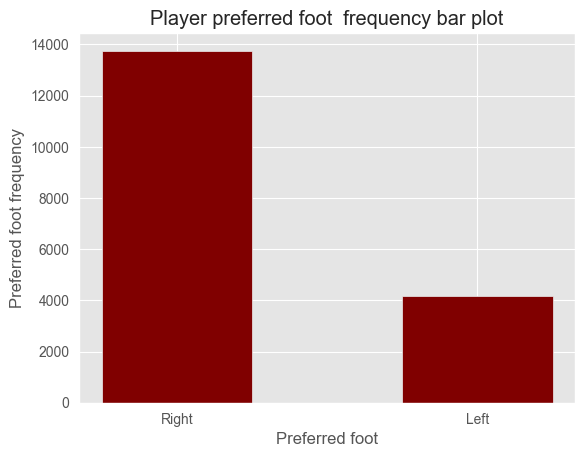

In [69]:
plt.bar(preferredFootDataframe.Preferred_foot, preferredFootDataframe.Frequency, color='maroon', width=0.5)
plt.xlabel("Preferred foot")
plt.ylabel("Preferred foot frequency")
plt.title("Player preferred foot  frequency bar plot")

<BarContainer object of 27 artists>

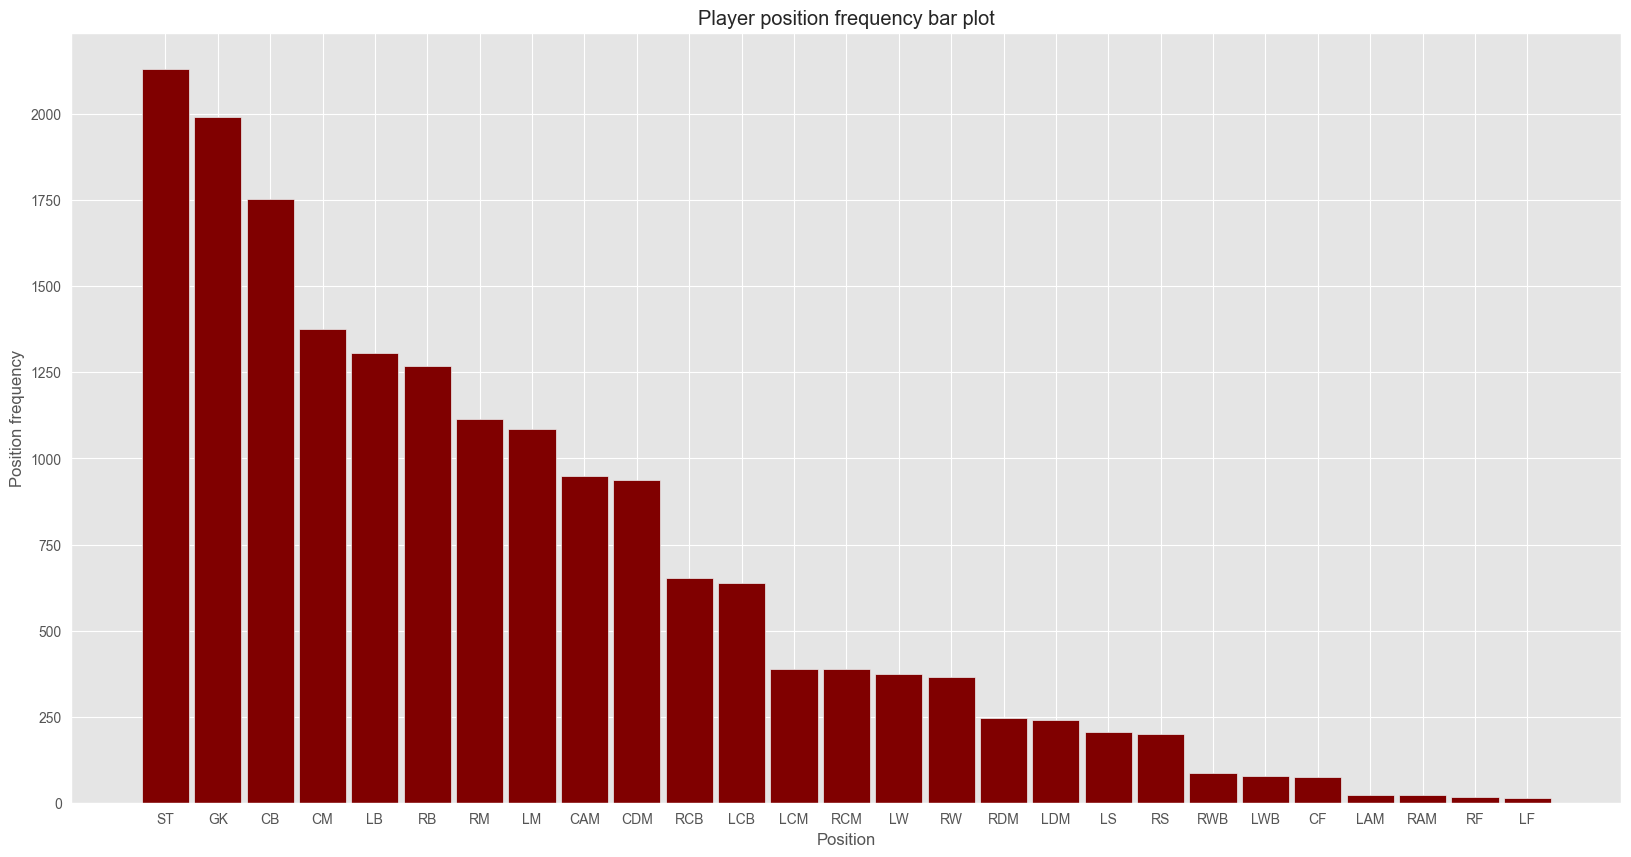

In [70]:
plt.figure(figsize=(20, 10))
plt.xlabel("Position")
plt.ylabel("Position frequency")
plt.title("Player position frequency bar plot")
plt.bar(positionDataframe.Position, positionDataframe.Frequency, color='maroon', width=.9)

Text(0.5, 1.0, 'Player position frequency bar plot')

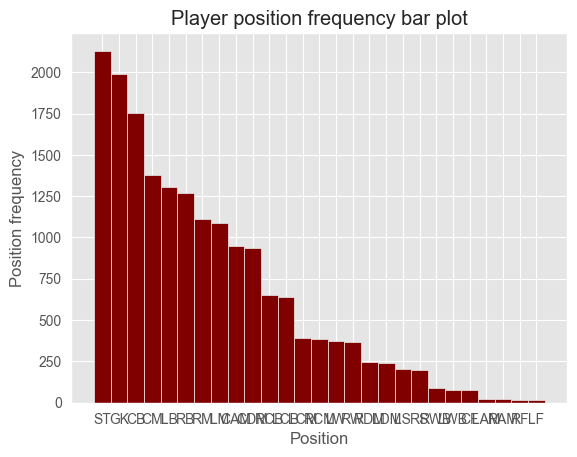

In [71]:
plt.bar(positionDataframe.Position, positionDataframe.Frequency, color='maroon', width=1)
plt.xlabel("Position")
plt.ylabel("Position frequency")
plt.title("Player position frequency bar plot")

Como segundo paso, se visualiza las gráficas de tipo dispersión todas las columnas a excepción de la columna **ID** común.

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Age**.

In [72]:
# dataframe.plot.scatter(x = 'ID', y = 'Age', s = 10, c = 'red', figsize=(5,5))
# plt.show()


Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Nationality**.

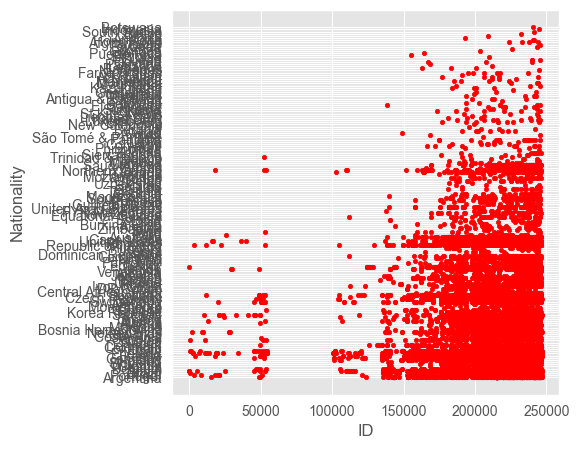

In [73]:
dataframe.plot.scatter(x='ID', y='Nationality', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Club**.

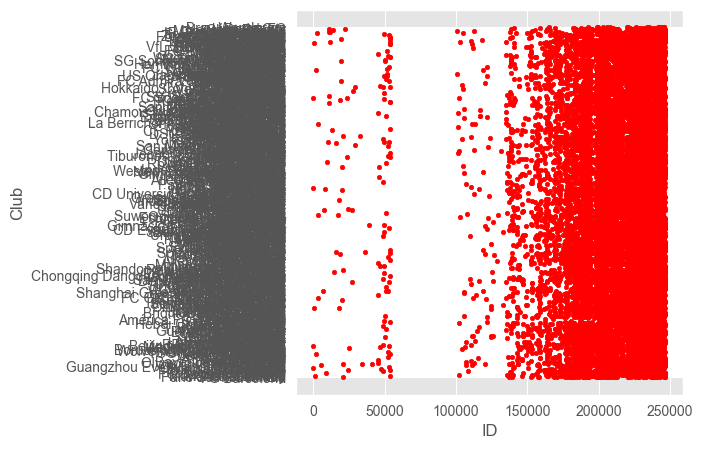

In [74]:
dataframe.plot.scatter(x='ID', y='Club', s=10, c='red', figsize=(5, 5))
plt.show()

In [75]:
dataframe = dataframe.astype({"ID": np.uint32, 'Age': np.uint8})
temp = pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])
temp = temp.iloc[1:, :].values.flatten().tolist()
x = np.arange(temp.shape[0])
y = [len(dataframe) for _ in range(0, temp.shape[0])]
plt.figure(figsize=(10, 5))
width = 0.35
plt.bar(x, y, width=width, color='b')
plt.bar(x + width, temp.values.flatten(), width=width, color='r')
plt.xticks(x, temp.index, rotation='vertical')
plt.show()

AttributeError: 'list' object has no attribute 'shape'

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Value**.

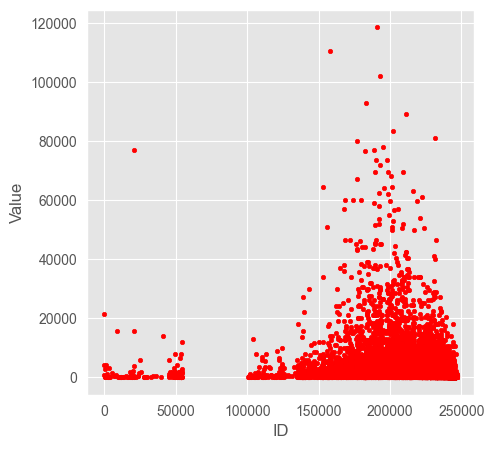

In [76]:
dataframe.plot.scatter(x='ID', y='Value', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Wage**.

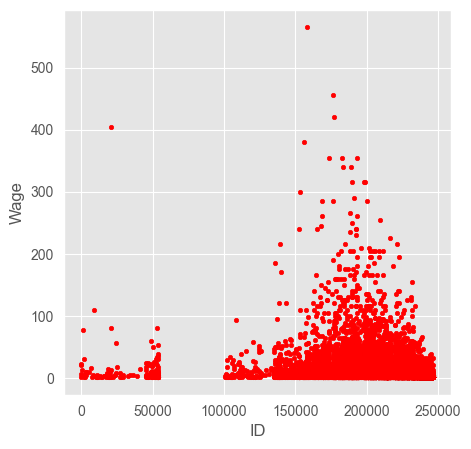

In [77]:
dataframe.plot.scatter(x='ID', y='Wage', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Preferred_foot**.

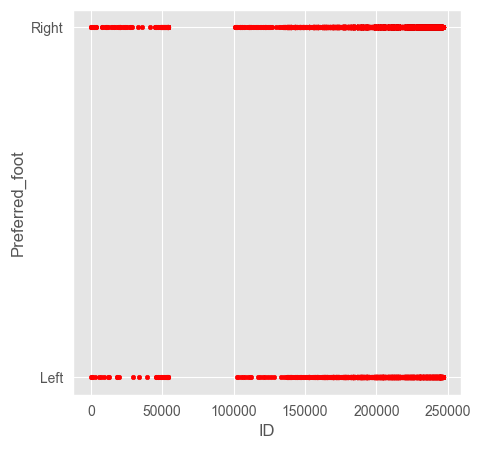

In [78]:
dataframe.plot.scatter(x='ID', y='Preferred_foot', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Position**.

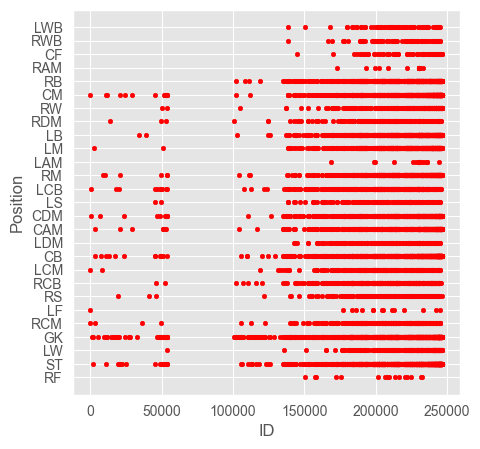

In [79]:
dataframe.plot.scatter(x='ID', y='Position', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Loaned**.

KeyError: 'Loaned'

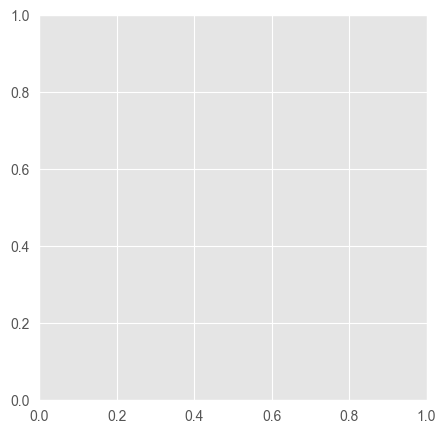

In [80]:
dataframe.plot.scatter(x='ID', y='Loaned', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Contract_Valid_Util**.

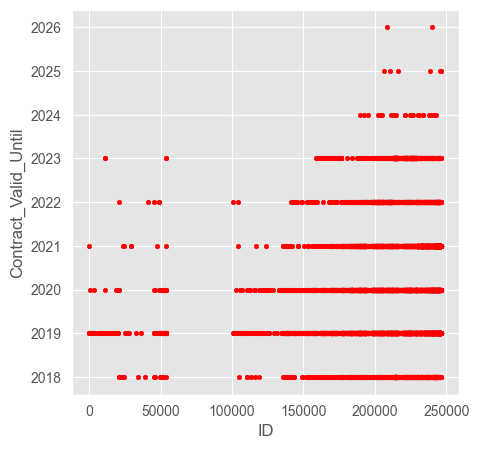

In [81]:
dataframe.plot.scatter(x='ID', y='Contract_Valid_Until', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Heigth**.

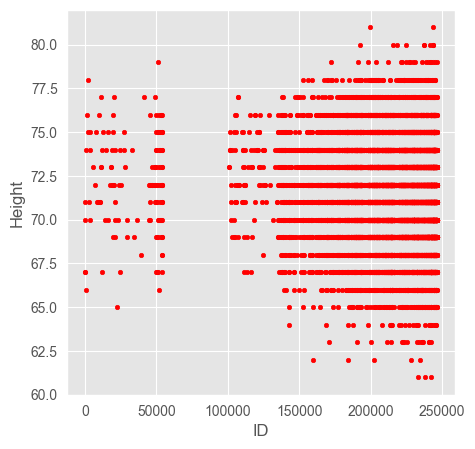

In [82]:
dataframe.plot.scatter(x='ID', y='Height', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Weight**.

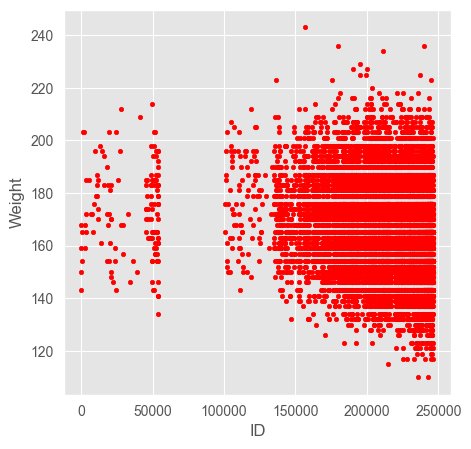

In [83]:
dataframe.plot.scatter(x='ID', y='Weight', s=10, c='red', figsize=(5, 5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Release_clause**.

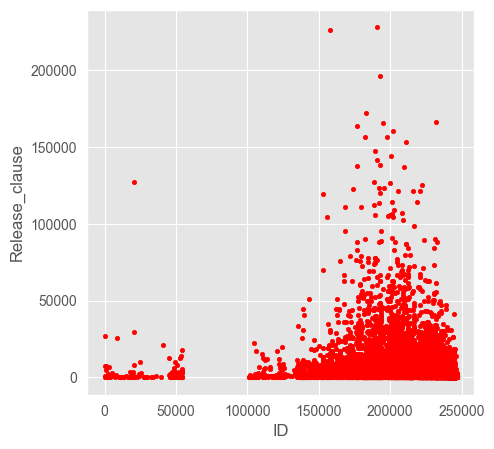

In [84]:
dataframe.plot.scatter(x='ID', y='Release_clause', s=10, c='red', figsize=(5, 5))
plt.show()

Como último paso, se visualiza la gráfica de tipo correlación para observar las relaciones mas significativas entre las columnas del dataframe normalizado.

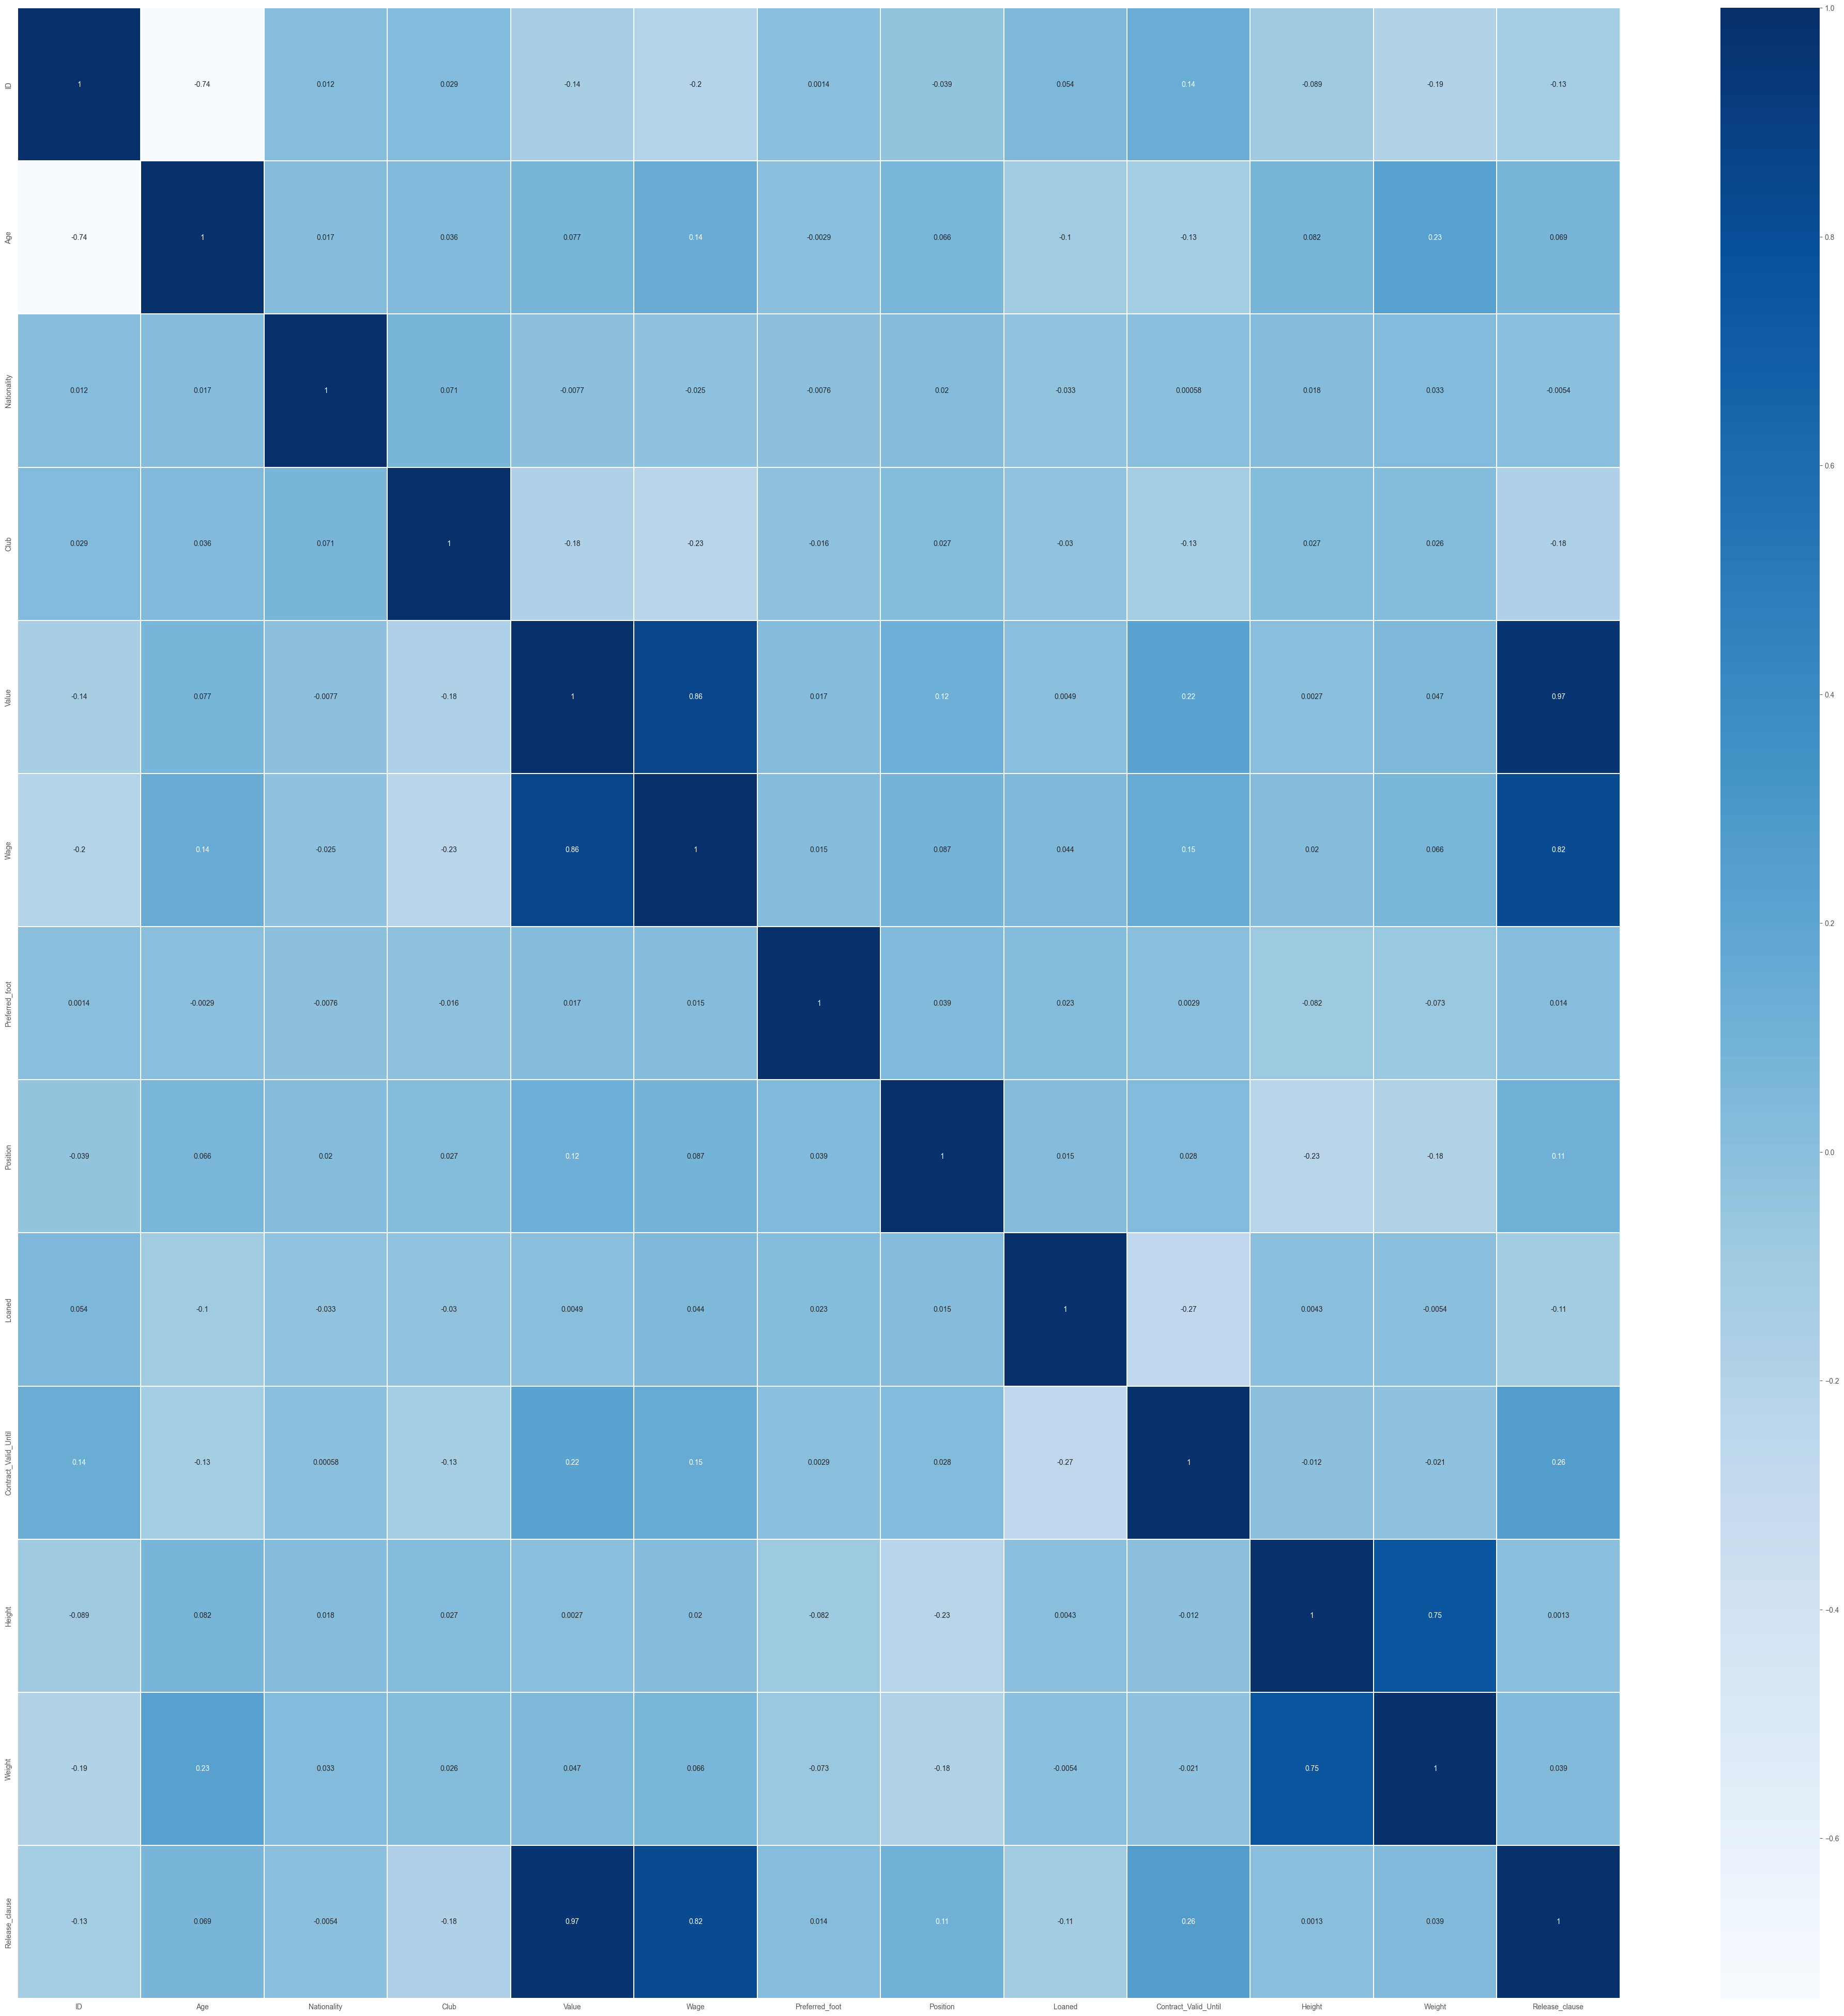

In [102]:
plt.figure(figsize=(50, 50))
sb.heatmap(normalizedDataframe.corr(), cmap='Blues', linewidths=0.30, annot=True)
plt.show()

In [101]:
#code cell for finding correlations columns

corr2 = normalizedDataframe.corr().values * ((np.eye(len(np.array(normalizedDataframe.corr().values))) - 1) * 1) * -1
print(np.max(corr2))
y, x = np.where(corr2 == np.max(corr2))
coord = list(zip(y, x))[0]
var1, var2 = list(normalizedDataframe.columns)[coord[0]], list(normalizedDataframe.columns)[coord[1]]

print(var1)
print(var2)

0.967180529692235
Value
Release_clause


In [ ]:
plt.bar(preferredFootDataframe.Preferred_foot, preferredFootDataframe.Frequency, color='maroon', width=0.5)
plt.xlabel("Preferred foot")
plt.ylabel("Preferred foot frequency")
plt.title("Player preferred foot  frequency bar plot")

In [ ]:


import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#data generation
import numpy as np

np.random.seed(123)
date_range = pd.period_range('1981-01-01', '1981-01-04', freq='D')
x = np.random.randint(1, 10, (4, 2))
y = np.random.randint(1, 10, (4, 2))
x = pd.DataFrame(x, index=date_range, columns=['station1', 'station2'])
y = pd.DataFrame(y, index=date_range + pd.to_timedelta(1, unit="D"), columns=['station1', 'station2'])

#keep information where each data point comes from
x["key"], y["key"] = "x", "y"

#combining dataframes and reshaping
df = pd.concat([x, y]).melt(["key"], var_name="station", value_name="station_value", ignore_index=False)

#plotting - the datetime conversion might not be necessary
#depending on the datetime format of your original dataframes
#best approach is conversion to datetime index when creating the dataframes
fg = sns.relplot(data=df, x=pd.to_datetime(df.index.to_timestamp()), y="station_value", kind="line", hue="key",
                 row="station")

#shouldn't be necessary but this example had too many ticks for the interval
# from matplotlib.dates import DateFormatter, DayLocator
# fg.axes[0,0].xaxis.set_major_locator(DayLocator(interval=1))
# fg.axes[0,0].xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))

plt.show()

In [ ]:
dataframe.loc[0]

In [ ]:
sb.pairplot(dataframe[['Value', 'Wage', 'Release_clause', 'Preferred_foot']], hue='Preferred_foot',
            palette=sb.color_palette("Paired"))


In [ ]:
sb.pairplot(dataframe[['Value', 'Wage', 'Release_clause', 'Loaned']], hue='Loaned', palette=sb.color_palette("Paired"))


In [ ]:
positionDataframe

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Release_clause**.

In [ ]:
dataframe.plot.scatter(x='ID', y='Release_clause', s=10, c='red', figsize=(5, 5))
plt.show()

Como último paso, se visualiza la gráfica de tipo correlación para observar las relaciones mas significativas entre las columnas del dataframe normalizado.

In [ ]:
dataframe

In [ ]:
normalizedDataframe

## Linear Regression model implementation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
heatmap_normalized = normalizedDataframe.corr(numeric_only=True)


In [ ]:
plt.figure(figsize=(100, 80))
sns.heatmap(corr_df, cmap='Blues', linewidths=0.30, annot=True)

In [88]:
original_df = pd.read_csv("futbol.csv")
corr_df = original_df.corr(numeric_only=True)

<AxesSubplot: >

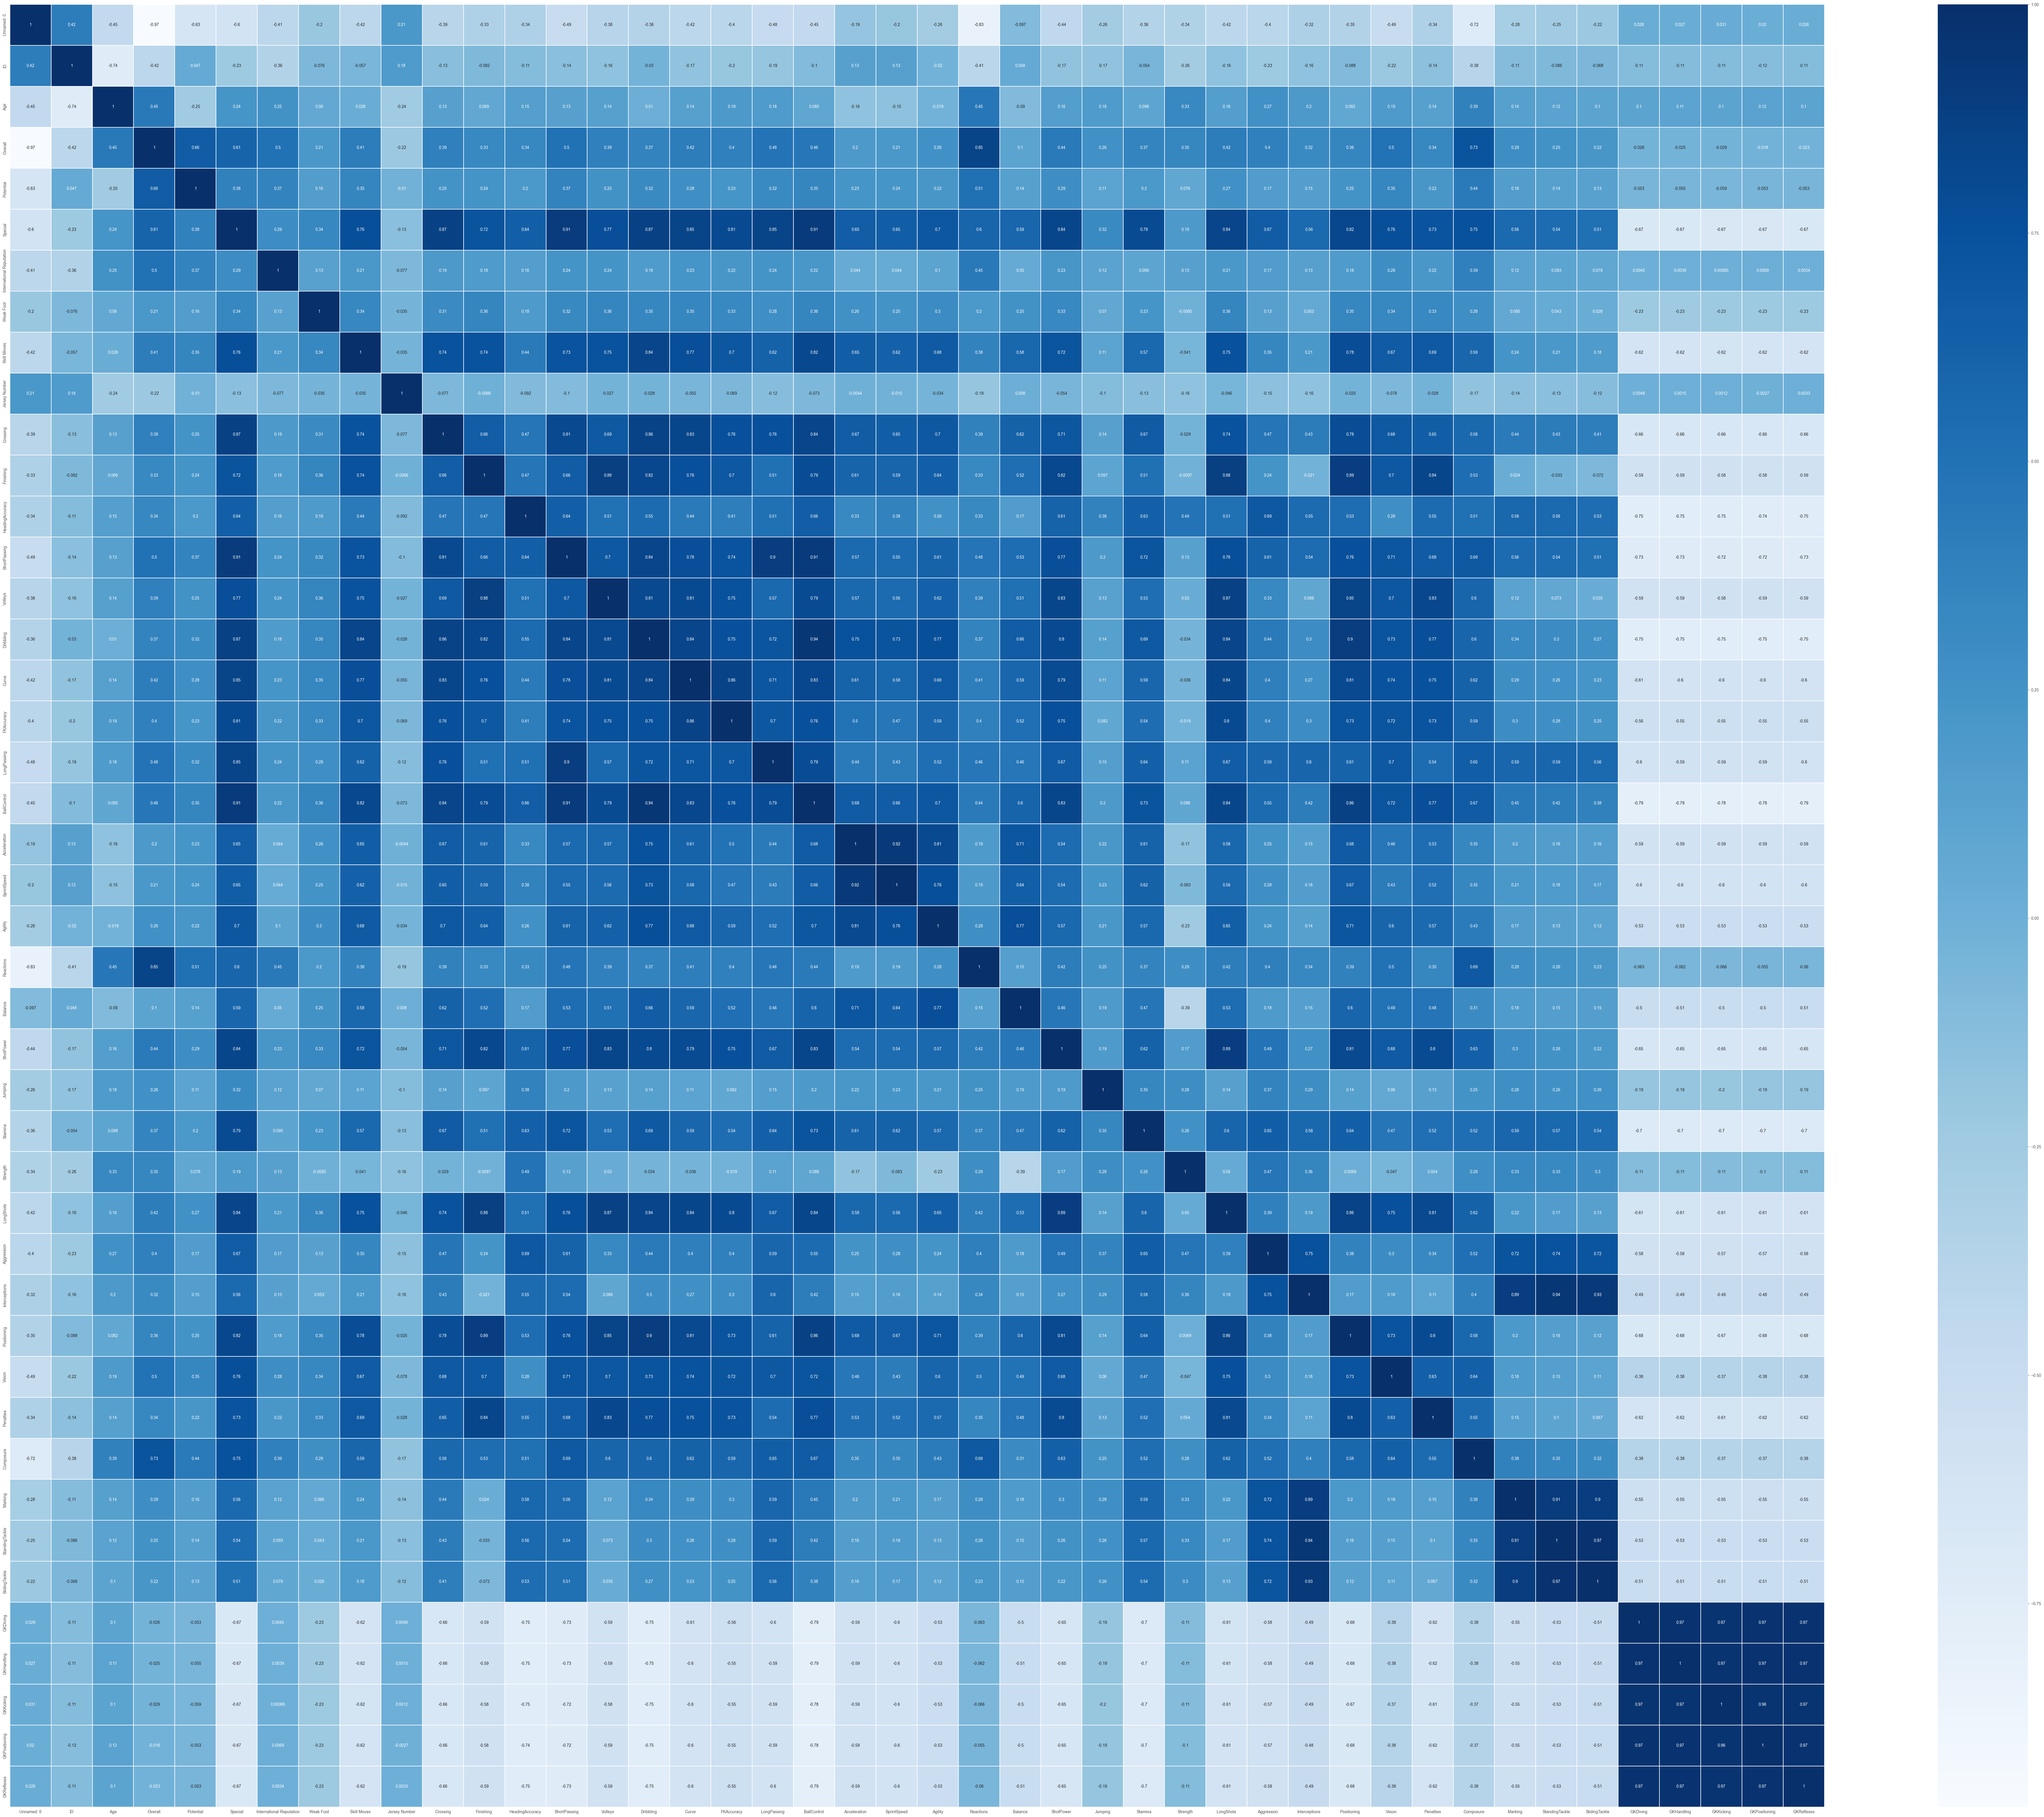

In [90]:
plt.figure(figsize=(100, 80))
sb.heatmap(corr_df, cmap='Blues', linewidths=0.30, annot=True)

The process to get the best correlation between 2 variables is complicated using a heat map. For that reason it's necessary to find them as an array. The following steps are needed for this purpose:

- Create an identity matrix which the diagonal has only 0 and the rest be 1
- Multiply the identity matrix by the correlation variable to remove the 1s diagonal generated by the correlation
- Find the high values in the corr variable and get their coordinates using a numpy function

In [ ]:
#code cell for finding correlations columns
corr_df = corr_df.values * ((np.eye(len(np.array(corr_df.values))) - 1) * 1) * -1
y, x = np.where(corr_df == np.max(corr_df))
coord = list(zip(y, x))[0]
var1, var2 = list(original_df.columns)[coord[0]], list(original_df.columns)[coord[1]]

print(var1)
print(var2)

In [91]:
corr_df = corr_df.values * ((np.eye(len(np.array(corr_df.values))) - 1) * 1) * -1

Visualizing the corr_df variable

In [92]:
corr_df

array([[-0.        ,  0.41575705, -0.45484623, ...,  0.03065368,
         0.01984233,  0.02561029],
       [ 0.41575705, -0.        , -0.73920819, ..., -0.10665181,
        -0.11825031, -0.1057784 ],
       [-0.45484623, -0.73920819, -0.        , ...,  0.10496355,
         0.1164021 ,  0.10331257],
       ...,
       [ 0.03065368, -0.10665181,  0.10496355, ..., -0.        ,
         0.96433643,  0.96633701],
       [ 0.01984233, -0.11825031,  0.1164021 , ...,  0.96433643,
        -0.        ,  0.97012959],
       [ 0.02561029, -0.1057784 ,  0.10331257, ...,  0.96633701,
         0.97012959, -0.        ]])

From the corr_df variable the highest value is obtained and the first coordinates are stored

In [93]:
y, x = np.where(corr_df == np.max(corr_df))
coord = list(zip(y, x))[0]

The variables with the highest correlation are the following

In [95]:
var1, var2 = list(original_df.columns)[coord[0]], list(original_df.columns)[coord[1]]

print(var1)
print(var2)

CAM
RAM


Visualizing the data from each selected column

In [96]:
df_var = original_df[[var1, var2]].dropna()

In [97]:
df_var

,CAM,RAM
0,93+2,93+2
1,88+3,88+3
2,89+3,89+3
4,88+3,88+3
5,89+3,89+3
...,...,...
18202,45+2,45+2
18203,40+2,40+2
18204,44+2,44+2
18205,45+2,45+2


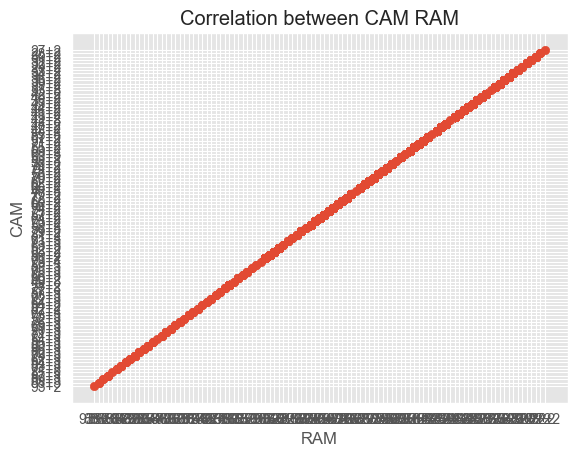

In [98]:
plt.title("Correlation between " + var1 + " " + var2)
plt.xlabel(var2)
plt.ylabel(var1)
plt.scatter(df_var[var2], df_var[var1])

Splitting the variables into trains set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_var[var1], df_var[var2], test_size=0.33, random_state=42)
X_train, X_test = X_train.values.reshape(-1, 1), X_test.values.reshape(-1, 1)

Instantiate of the Linear Regression model and fit

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

Evaluating the model with the test set

In [ ]:
lr.score(X_train, y_train)

THe following figure shows the line generated by the linear regression model compared to all data from both variables extracted from the dataset

In [ ]:
plt.title("Correlation between " + var1 + " " + var2)
plt.xlabel(var2)
plt.ylabel(var1)
plt.scatter(df_var[var2], df_var[var1])
plt.plot(X_test, lr.predict(X_test), color="blue", linewidth=3)
plt.legend(['Data points', "Linear Regression model"])

In [ ]:
plt.bar(preferredFootDataframe.Preferred_foot, preferredFootDataframe.Frequency, color='maroon', width=0.5)
plt.xlabel("Preferred foot")
plt.ylabel("Preferred foot frequency")
plt.title("Player preferred foot  frequency bar plot")

In [ ]:
sb.pairplot(dataframe[['Value', 'Wage', 'Release_clause', 'Preferred_foot']], hue='Preferred_foot',
            palette=sb.color_palette("Paired"))


In [ ]:
positionDataframe

## Predictive modelling